In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from termcolor import colored
import pickle

In [2]:
data = pd.read_csv('../data.csv')

In [3]:
Y = data['class']
X = data.drop('class', axis=1)
feature_names = X.columns

In [4]:
Y.unique()

array(['g', 'h'], dtype=object)

In [5]:
Y.replace("g", 0, inplace=True)
Y.replace("h", 1, inplace=True)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=41)

In [7]:
from sklearn.metrics import classification_report

def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Confusion matrix for model {} on {} data ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    data = pd.DataFrame(confusion_matrix(y, y_pred), columns=['g', 'h'], index=['g', 'h'])
    _ = sns.heatmap(data, annot=True, fmt='g', xticklabels=model.classes_, yticklabels=model.classes_, cmap = plt.cm.Reds)
    print("---------------------------------------------------------------------------------")
    

def plot_decision_tree(model, feature_names):
    plt.figure(figsize=(7, 7))
    plot_tree(model, class_names=['B', 'M'], feature_names=feature_names, filled=True)
    plt.title("Decision tree of depth {} with {} nodes".format(model.get_depth(), model.get_n_leaves()))

    plt.show()
    print("---------------------------------------------------------------------------------")
    print(colored("Parameters of model {}".format(type(model).__name__), "green"))
    for k, v in model.get_params().items():
        print(colored(k, 'blue'), v)
    
    print("---------------------------------------------------------------------------------")

    

In [8]:
dtc = DecisionTreeClassifier(class_weight='balanced', random_state=41)

In [9]:
dtc.fit(X_train, Y_train) # treninranje modela

DecisionTreeClassifier(class_weight='balanced', random_state=41)

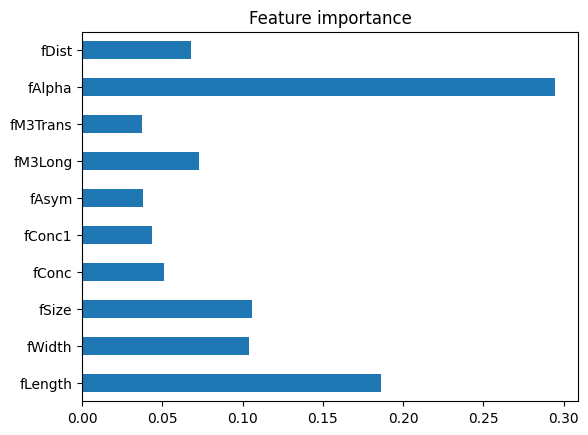

In [10]:
pd.Series(dtc.feature_importances_, index=X.columns).plot.barh()
plt.title("Feature importance")
plt.show()

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9249
           1       1.00      1.00      1.00      5016

    accuracy                           1.00     14265
   macro avg       1.00      1.00      1.00     14265
weighted avg       1.00      1.00      1.00     14265

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data 
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------


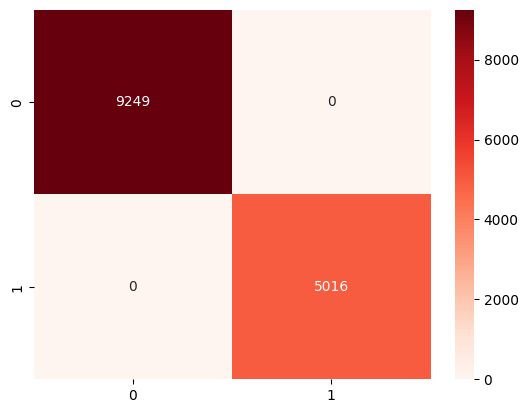

In [11]:
report(dtc, X_train, Y_train)

Classification report for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3083
           1       0.73      0.74      0.73      1672

    accuracy                           0.81      4755
   macro avg       0.80      0.80      0.80      4755
weighted avg       0.81      0.81      0.81      4755

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on test data 
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------


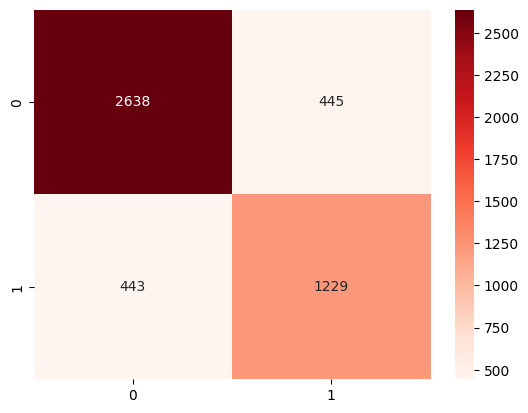

In [12]:
report(dtc, X_test, Y_test, "test")

In [13]:
from sklearn.model_selection import GridSearchCV

params = {'criterion': ['gini', 'entropy'],
          'max_depth': [5, 10, 15, 20],
          'min_samples_leaf' : [2, 5, 10, 15, 25, 50],
         }

In [14]:
estimator = GridSearchCV(dtc, param_grid=params, scoring = 'roc_auc', cv = 4, verbose=4) 

In [15]:
estimator.fit(X_train, Y_train)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
[CV 1/4] END criterion=gini, max_depth=5, min_samples_leaf=2;, score=0.869 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=5, min_samples_leaf=2;, score=0.856 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=5, min_samples_leaf=2;, score=0.877 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=5, min_samples_leaf=2;, score=0.865 total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=5, min_samples_leaf=5;, score=0.868 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=5, min_samples_leaf=5;, score=0.857 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=5, min_samples_leaf=5;, score=0.877 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=5, min_samples_leaf=5;, score=0.866 total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=5, min_samples_leaf=10;, score=0.868 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=5, min_samples_leaf=10;, score=0.857 total time=   0

[CV 3/4] END criterion=gini, max_depth=20, min_samples_leaf=15;, score=0.887 total time=   0.1s
[CV 4/4] END criterion=gini, max_depth=20, min_samples_leaf=15;, score=0.881 total time=   0.1s
[CV 1/4] END criterion=gini, max_depth=20, min_samples_leaf=25;, score=0.890 total time=   0.1s
[CV 2/4] END criterion=gini, max_depth=20, min_samples_leaf=25;, score=0.882 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=20, min_samples_leaf=25;, score=0.898 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=20, min_samples_leaf=25;, score=0.888 total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=20, min_samples_leaf=50;, score=0.892 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=20, min_samples_leaf=50;, score=0.882 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=20, min_samples_leaf=50;, score=0.894 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=20, min_samples_leaf=50;, score=0.886 total time=   0.0s
[CV 1/4] END criterion=entropy, max_dept

[CV 4/4] END criterion=entropy, max_depth=20, min_samples_leaf=2;, score=0.821 total time=   0.1s
[CV 1/4] END criterion=entropy, max_depth=20, min_samples_leaf=5;, score=0.854 total time=   0.1s
[CV 2/4] END criterion=entropy, max_depth=20, min_samples_leaf=5;, score=0.831 total time=   0.1s
[CV 3/4] END criterion=entropy, max_depth=20, min_samples_leaf=5;, score=0.867 total time=   0.1s
[CV 4/4] END criterion=entropy, max_depth=20, min_samples_leaf=5;, score=0.845 total time=   0.1s
[CV 1/4] END criterion=entropy, max_depth=20, min_samples_leaf=10;, score=0.863 total time=   0.1s
[CV 2/4] END criterion=entropy, max_depth=20, min_samples_leaf=10;, score=0.860 total time=   0.1s
[CV 3/4] END criterion=entropy, max_depth=20, min_samples_leaf=10;, score=0.880 total time=   0.1s
[CV 4/4] END criterion=entropy, max_depth=20, min_samples_leaf=10;, score=0.869 total time=   0.1s
[CV 1/4] END criterion=entropy, max_depth=20, min_samples_leaf=15;, score=0.876 total time=   0.1s
[CV 2/4] END cr

GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=41),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [2, 5, 10, 15, 25, 50]},
             scoring='roc_auc', verbose=4)

In [16]:
estimator.best_params_

{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 25}

In [17]:
estimator.best_score_

0.8896794128976383

In [18]:
dtcCV = estimator.best_estimator_

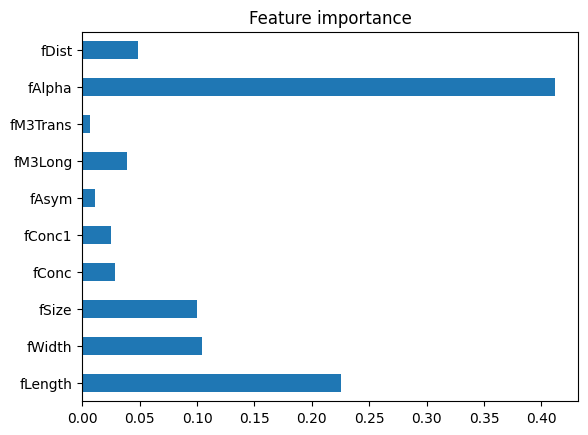

In [19]:
pd.Series(dtcCV.feature_importances_, index=X.columns).plot.barh()
plt.title("Feature importance")
plt.show()

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      9249
           1       0.77      0.86      0.82      5016

    accuracy                           0.86     14265
   macro avg       0.85      0.86      0.85     14265
weighted avg       0.87      0.86      0.87     14265

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data 
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------


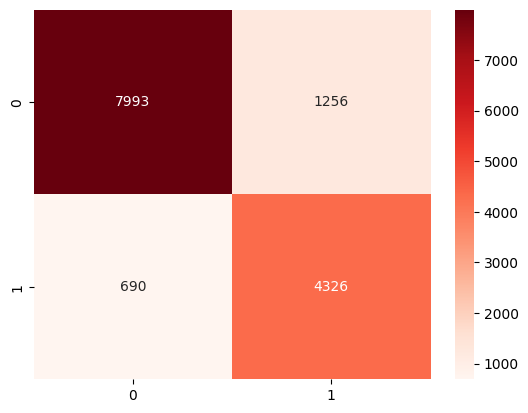

In [20]:
report(dtcCV, X_train, Y_train)

Classification report for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      3083
           1       0.73      0.81      0.77      1672

    accuracy                           0.83      4755
   macro avg       0.81      0.82      0.82      4755
weighted avg       0.84      0.83      0.83      4755

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on test data 
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------


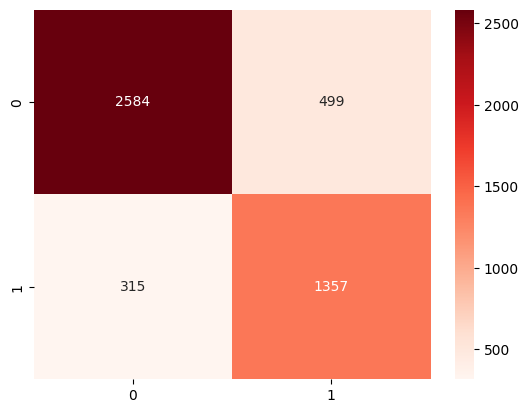

In [21]:
report(dtcCV, X_test, Y_test, "test")

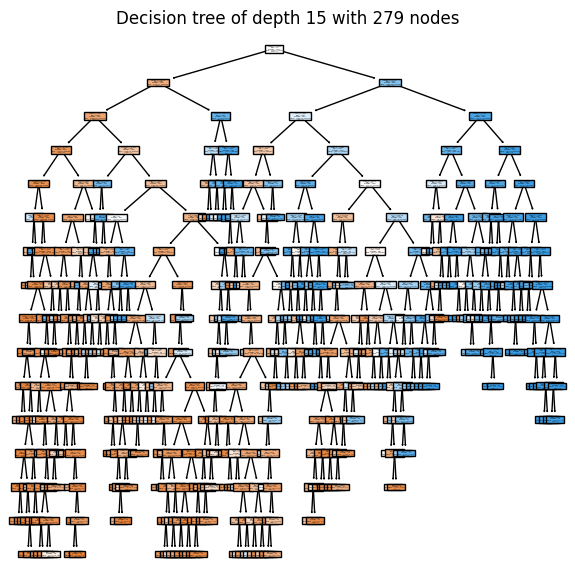

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight balanced
criterion gini
max_depth 15
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 25
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state 41
splitter best
---------------------------------------------------------------------------------


In [22]:
plot_decision_tree(dtcCV, feature_names)

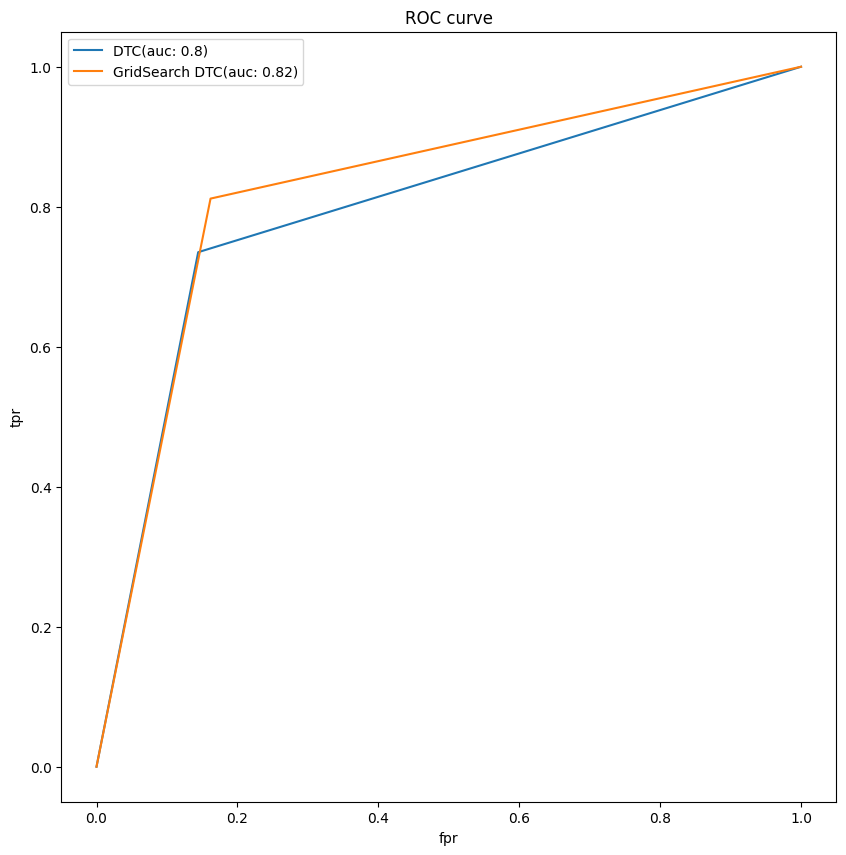

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [dtc, dtcCV]
model_names = ['DTC', 'GridSearch DTC']

plt.figure(figsize=(10, 10))

for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title("ROC curve")
plt.legend()
plt.show()

In [25]:
with open('DTC.pkl', 'wb') as file:  
    pickle.dump(dtcCV, file)